In [353]:
# Execute before using this notebook if using google colab

kernel = str(get_ipython())

if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

In [397]:
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import Datasets

**Important**

We will introduce and use two additional python modules from now on:

1. `Pandas`: handling and manipulating tabular data 

2. `Statsmodel`: statistical package for model building (e.g. regression models)

#  Linear regression

We will be using the advertising dataset from [Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/index.html) for the following chapter. 

Unlike in previous chapters we will load the dataset as a `pandas dataframe` instead of a numpy array. This will make data handling and visual inspection much easier. Also `pandas` works very well with other statistical package, e.g. statsmodel. 

The dataset contains 

- sales in thousands units
- advertising budgets in thousand of dollars for TV, radio and newspaper

with $200$ data points in total

In [398]:
df = pd.read_csv("data/Advertising.csv") # read csv file into pandas
df.head() # show first 5 items

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [399]:
df = df.drop(columns="Unnamed: 0") # we don't need the index column from the original file
df.head() # show first 5 items

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Linear regression is the standard topic of almost any statistical textbook. Although it is considered as a basic statistical method it is a very powerful tool in statistics and a very good starting point when conducting statistical analysis. For many more advanced method linear regression should serve as a benchmark. 

Purpose of this notebook is therefore to:

1. understand linear regression in depth

2. implement linear regression in python

Imagine we are the manager of the finance division and we want to understand the budget of the marketing unit. We may ask ourselves:

1. Is there a relation between advertising spent and sales?

2. Should we rather advertise via radio or via tv in order to increase sales?

3. Can we predict future sales with advertising data?

...

All these questions can be adressed with linear regression (amongst others). 

## Simple Linear Regression

Asssumes that there is a linear relationship between $X$ and $Y$ such that 

$$Y \approx \beta_0 + \beta_1X$$

$\beta_0$ and $\beta_1$ are the slope and the intercept in this linear model and are commonly referred to as the *coefficients* (or parameters) of the linear model. 

Given the above equation in practice is unknow, we will use our sample (advertising) data to calculate estimates of both coefficients such that: 

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x $$

where $\hat{y}$ denotes the prediction of $Y$ given $X = x$. 

$\hat{\beta}_0$ and $\hat{\beta}_1$ are the coefficient estimates. We will use our data (in which $Y$ is known) to estimate both coefficients such that $\hat{y}$ is close to $Y$ for each data point. 

Commonly, we do this by minimizing the *least squares* criterion, i.e. we want to minimize the resdiual sum of squares 

$$
\text{RSS} = \sum_{i=1}^n e_i^2
$$

where $e_i$ is defined as 

$$
e_i = y_i - \hat{y}_i
$$



This leads to the below $\beta_0$ and $beta_1$ that minimizes the RSS:

\begin{equation}
\begin{split}
\hat{\beta}_1 & = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \\[10pt]
\hat{\beta}_0 & = \bar{y} - \hat{\beta}_1\bar{x}
\end{split}
\end{equation}


Let's have an ineractive look how this works, exactly: [click me](https://share.streamlit.io/fredzett/rmqa/regression.py)

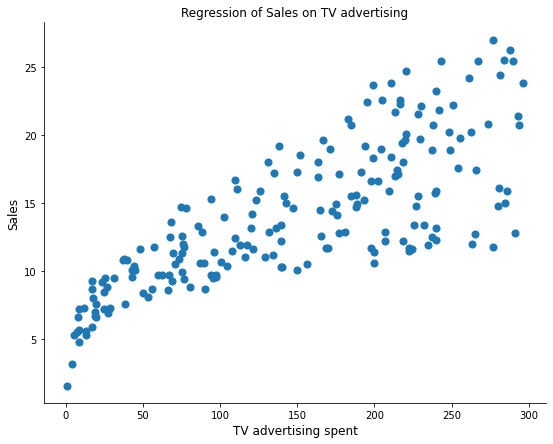

In [444]:
betas = [8,0.07]
fig, ax = plt.subplots(figsize=(9,7))
y = df["sales"]
X = df["TV"]
yhat = betas[0] + betas[1]*X
ax.scatter(X,y,s=50)
#ax.plot(X,yhat, linewidth=3, color="red")
#ax.vlines(X,ymin=y, ymax=yhat, color="lightgray", alpha=0.5)


ax.set_xlabel("TV advertising spent",size=12)
ax.set_ylabel("Sales", size=12)
ax.set_title("Regression of Sales on TV advertising")
sns.despine()

In [464]:
model = smf.ols("sales ~ TV",df).fit()#.predict(df.loc[:,"TV"])
b0, b1 = model.params.values
b0

7.032593549127696

In [449]:
df["TV"].name

'TV'

In [445]:
X = sm.add_constant(X)

In [446]:
sm.OLS(X,y).fit().predict(X)

ValueError: shapes (200,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [560]:

def _rss(y, yhat):
    return np.sum((y - yhat)**2)

def _mse(y,X,b0,b1):
    yhat = b0 + b1*X
    return _rss(y,yhat)/len(y)
from matplotlib import cm
xtrue = df["TV"]
ytrue = df["sales"]

def _calc_loss(y,X):
    XB0 = np.linspace(0,20,100)
    YB1 = np.linspace(-0.4,0.4,100)
    XX, YY = np.meshgrid(XB0, YB1)
    ZZ = np.array([_mse(ytrue,xtrue,i,j) 
            for i,j in zip(np.ravel(XX), np.ravel(YY))])
    Z = ZZ.reshape(XX.shape)
    return Z

In [709]:
def plot_surface(xx,yy,zz):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx,yy,zz, cmap=cm.coolwarm,
                           linewidth=2, antialiased=False, alpha=0.4)
    ax.set_xlabel("b0", size=12), ax.set_ylabel("b1", size=12), ax.set_zlabel("MSE", size=12);
    ax.set_zlim(0,np.max(zz))
    #ax.scatter(b0,b1,rss, color="green", s=160)

In [746]:

def _loss_grid(x,y,w0s, w1s):

    WW0, WW1 = np.meshgrid(w0s, w1s)
    W0 = np.ravel(WW0).reshape(1,-1)
    W1 = np.ravel(WW1).reshape(1,-1)

    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    yhat = W0 + np.dot(x,W1)

    mse = np.sum((y-yhat)**2,axis=0) #/ len(y)
    mse = mse.reshape(WW0.shape)
    return WW0, WW1, mse

In [747]:
x = df["TV"].values
y = df["sales"].values
w0s = np.linspace(0,20,20)#(0,20,100)
w1s = np.linspace(-0.4,0.40,20)#(-0.4, 0.4, 100)
xx, yy, mse = _loss_grid(x,y, w0s, w1s)

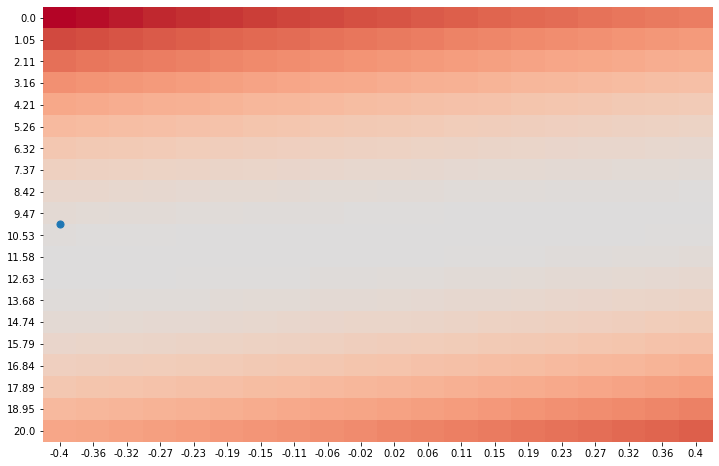

In [772]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.heatmap(mse, yticklabels=np.round(w0s,2), xticklabels=np.round(w1s,2), cbar=False,center=True, cmap=cm.coolwarm)
ax.scatter(0.5,10,s=50);

In [763]:
np.min(mse)

2515.610602770081

In [756]:
cbar.formatter(":.2f")

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [749]:
0.2*1e6

200000.0

In [711]:
yhat = np.max(W0)+ np.max(W1)*x
np.sum((y - yhat)**2)/len(y)

5119.957602

In [715]:
idx = np.argmin(mse)
np.ravel(mse)[idx]

12.578053013850406

In [664]:
y = np.array([1,2,3,4]).reshape(-1,1)
w1 = np.array([0,1,2,3,4,5,6,7,8]).reshape(1,-1)
np.dot(y,w1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32]])

In [654]:
W1s = np.repeat(W1, len(y)).reshape(len(W0),-1)
W0s = np.repeat(W0, len(y)).reshape(len(W1), -1)
xrep = np.repeat(x,len(x)).reshape(len(x),-1)
yhats = W0s + np.dot(W1s, xrep) 
ytrue = np.repeat(y,len(W0)).reshape(len(W0),-1)
rss = np.sum((ytrue - yhats)**2, axis=1)

In [656]:
np.min(rss)

2210178.794816817

In [640]:
yhats.shape

(10000, 200)

In [621]:
0 + 0.4 * x

0       92.04
1       17.80
2        6.88
3       60.60
4       72.32
        ...  
195     15.28
196     37.68
197     70.80
198    113.44
199     92.84
Name: TV, Length: 200, dtype: float64

In [606]:
bX = np.dot(np.array([ytrue]),b0).T
yhat =b1 + bX[:, 0]
yhat.shape

(10000,)

In [576]:
xtrue.shape

(200,)

In [564]:
_mse(ytrue,xtrue, b0,b1)

ValueError: operands could not be broadcast together with shapes (10000,) (200,) 

In [554]:
def plot_surface(xx,yy,zz, bo,b1,rss):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(XX,YY,Z, cmap=cm.coolwarm,
                           linewidth=2, antialiased=False, alpha=0.2)
    ax.set_xlabel("b0", size=12), ax.set_ylabel("b1", size=12), ax.set_zlabel("MSE", size=12);
    ax.set_zlim(0,np.max(Z)*1.5)
    ax.scatter(b0,b1,rss, color="green", s=160)

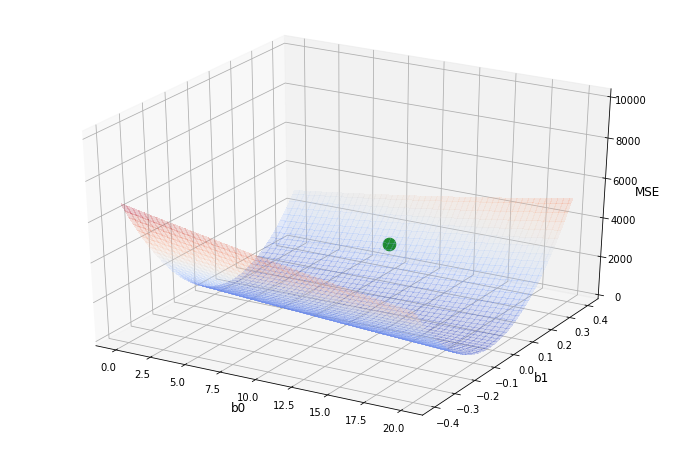

In [555]:
plot_surface(XX,YY,Z, 3,0.4,1020)

In [337]:
#X = np.vstack((X,X**2)).T
X = sm.add_constant(X)

In [338]:
model = sm.OLS(y,X).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.963   
Dependent Variable: y                AIC:                265.0868
Date:               2020-10-28 18:14 BIC:                270.2972
No. Observations:   100              Log-Likelihood:     -130.54 
Df Model:           1                F-statistic:        2575.   
Df Residuals:       98               Prob (F-statistic): 3.65e-72
R-squared:          0.963            Scale:              0.81318 
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    5.0287      0.0902    55.7649    0.0000    4.8497    5.2076
x1       7.8466      0.1546    50.7424    0.0000    7.5397    8.1535
-----------------------------------------------------------------
Omnibus:               7.864        Durbin-Watson:          1.889
Prob(Omnibus):         0.020        Jarque-Bera (JB):       9.477
Skew:                  -0.417       Prob(JB):               0.009
Kurtosis:              4.256        Condition No.:          2    
=================================================================

"""

AIC = -2/N * LL + 2 * k/N
BIC = -2 * LL + log(N) * k

In [339]:
def loglikelihood(y,X, b0,b1):
    return sm.OLS(y,X).loglike((b0,b1))

In [340]:
b0 = np.linspace(-100,100,100)
b1 = np.linspace(-100, 100, 100)
data = list()
for i in b0:
    for j in b1:
        data.append([i,j, loglikelihood(y,X,i,j)])

In [341]:
df = pd.DataFrame(data, columns=["b0","b1","ll"])
XX, YY = np.meshgrid(b0,b1)

In [342]:
data = list()
for i in XX:
    for j in YY:
        data.append(loglikelihood(y,X,i,j))

In [343]:
data = np.array(data)

In [344]:
data = np.array(data).reshape(100,100)

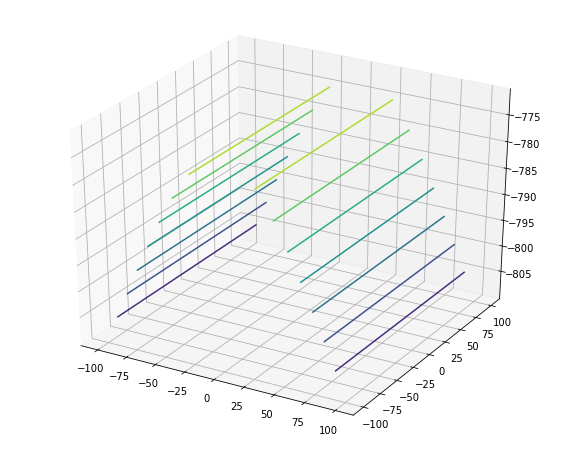

In [346]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(XX,YY,data,)


In [328]:
loglikelihood(y,X,100,8)

-597.1285615154218

In [239]:
yhat = model.predict(X)
ssr = np.sum((y - yhat)**2)

In [205]:
n = len(y) / 2
 

-1397.6105398274708

In [159]:

ehat = (y - yhat)
rss = np.sum(ehat**2)
tss = np.sum((y - np.mean(y))**2)
r2 = (tss - rss) / tss
r2

0.9704293608914327

In [103]:
se2 = np.std(ehat, ddof=1)**2 / np.sum( (X - np.mean(X, axis=0))**2)
se2

0.030390596963004914

In [76]:
se2 = np.sqrt(se2)
se2

0.14395587443806826

In [55]:
import scipy.stats as stats

In [61]:
zvalue = (10.0093 - 0)/se2
stats.norm().ppf(0.025)

-1.9599639845400545